# CMI - Detect Behavior with Sensor Data [🔗](https://www.kaggle.com/competitions/cmi-detect-behavior-with-sensor-data/overview)

In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette('Set2')

## Demographics Data

In [9]:
# Read demographics Data
df_demo = pd.read_csv('./data/train_demographics.csv')
df_demo

,subject,adult_child,age,sex,handedness,height_cm,shoulder_to_wrist_cm,elbow_to_wrist_cm
0,SUBJ_000206,1,41,1,1,172.0,50,25.0
1,SUBJ_001430,0,11,0,1,167.0,51,27.0
2,SUBJ_002923,1,28,1,0,164.0,54,26.0
3,SUBJ_003328,1,33,1,1,171.0,52,25.0
4,SUBJ_004117,0,15,0,1,184.0,54,28.0
...,...,...,...,...,...,...,...,...
76,SUBJ_063319,1,25,1,1,173.0,50,29.0
77,SUBJ_063346,1,42,1,1,183.0,51,26.0
78,SUBJ_063447,1,36,0,1,175.0,54,25.0
79,SUBJ_063464,0,15,0,1,162.0,43,23.0


In [13]:
df_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   subject               81 non-null     object 
 1   adult_child           81 non-null     int64  
 2   age                   81 non-null     int64  
 3   sex                   81 non-null     int64  
 4   handedness            81 non-null     int64  
 5   height_cm             81 non-null     float64
 6   shoulder_to_wrist_cm  81 non-null     int64  
 7   elbow_to_wrist_cm     81 non-null     float64
dtypes: float64(2), int64(5), object(1)
memory usage: 5.2+ KB


In [11]:
df_demo.describe()

,adult_child,age,sex,handedness,height_cm,shoulder_to_wrist_cm,elbow_to_wrist_cm
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,0.518519,21.814815,0.617284,0.876543,167.993827,51.580247,25.469136
std,0.502770,10.289693,0.489078,0.331010,10.605863,4.888415,3.025254
min,0.000000,10.000000,0.000000,0.000000,135.000000,41.000000,18.000000
25%,0.000000,13.000000,0.000000,1.000000,163.000000,49.000000,24.000000
50%,1.000000,22.000000,1.000000,1.000000,170.000000,52.000000,25.000000
75%,1.000000,27.000000,1.000000,1.000000,174.000000,55.000000,27.000000
max,1.000000,53.000000,1.000000,1.000000,190.500000,71.000000,44.000000


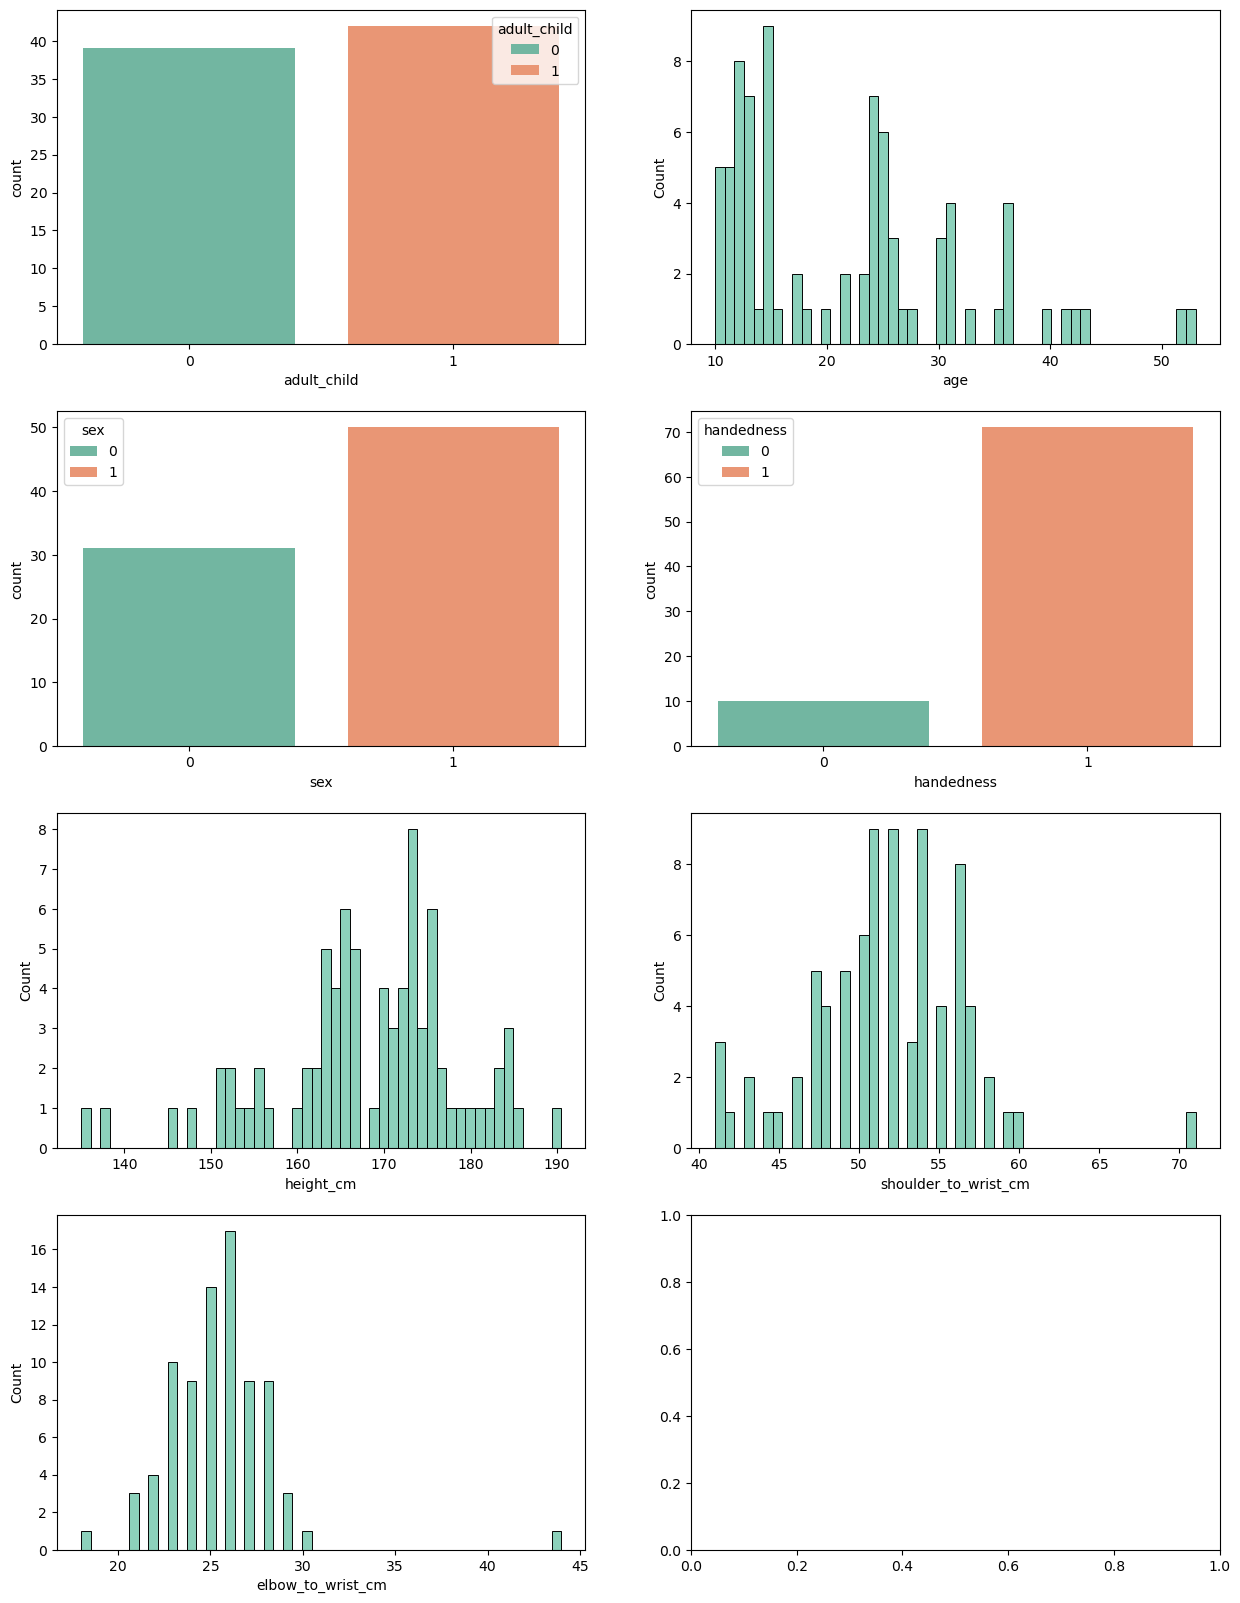

In [180]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))

for i, col in enumerate(df_demo.columns[1:]):
    r = i // 2
    c = i % 2
    if df_demo[col].nunique() == 2:
        sns.countplot(data=df_demo, x=col, ax=axes[r][c], hue=col)
    else:
        sns.histplot(data=df_demo, x=col, ax=axes[r][c], bins=50)  

- adult > child
- child younger than 15 > child older than 15
- men > women
- right-handedness >>> left-handedness
- `shoulder_to_wrist_cm` and `elbow_to_wrist_cm` have anomaly data

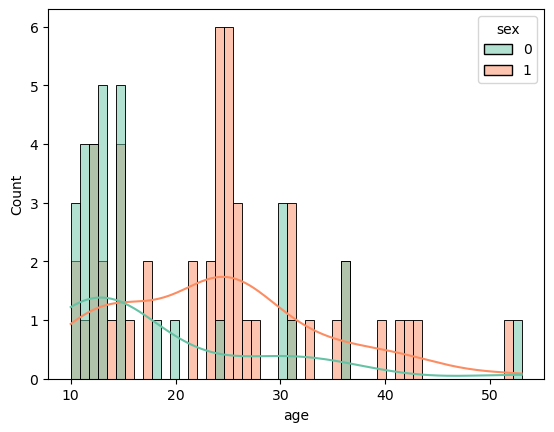

In [183]:
# Distribution of 'age' regarding 'sex'
sns.histplot(data=df_demo, x='age', hue='sex', bins=50, kde=True, )
plt.show()

In [185]:
# Anomaly data
df_demo.loc[df_demo['shoulder_to_wrist_cm'] > 60]

,subject,adult_child,age,sex,handedness,height_cm,shoulder_to_wrist_cm,elbow_to_wrist_cm
7,SUBJ_011323,1,30,0,1,175.0,71,44.0


- `shoulder_to_wrist_cm` and `elbow_to_wrist_cm` too long. [(Anthropometric data from North Carolina State University)](https://multisite.eos.ncsu.edu/www-ergocenter-ncsu-edu/wp-content/uploads/sites/18/2016/06/Anthropometric-Detailed-Data-Tables.pdf)

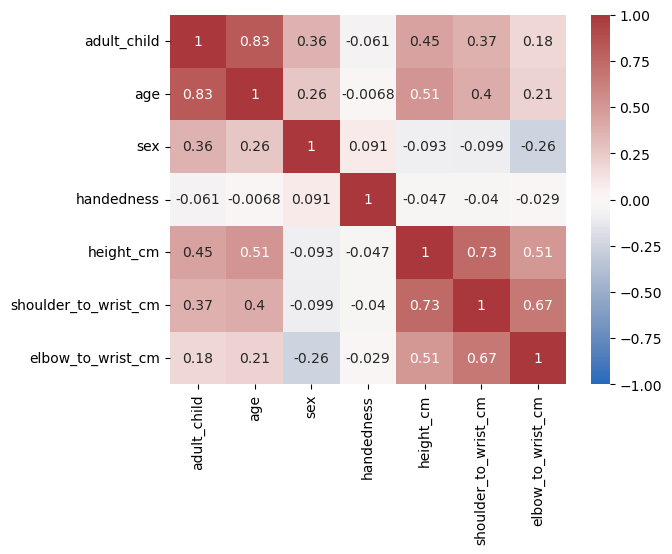

In [188]:
# Correlation matrix
sns.heatmap(df_demo[df_demo.columns[1:]].corr(), annot=True, vmin=-1, vmax=1, cmap='vlag')
plt.show()

- adult_child & age: 0.83 => Use just one of them
- age & height: 0.51
- height_cm & shoulder_to_wrist_cm: 0.73
- height_cm & elbow_to_wrist_cm: 0.51
- shoulder_to_wrist_cm & elbow_to_wrist_cm: 0.67

## Main data

In [7]:
# Read data
df = pd.read_csv('./data/train.csv')
df

,row_id,sequence_type,sequence_id,sequence_counter,subject,orientation,behavior,phase,gesture,acc_x,...,tof_5_v54,tof_5_v55,tof_5_v56,tof_5_v57,tof_5_v58,tof_5_v59,tof_5_v60,tof_5_v61,tof_5_v62,tof_5_v63
0,SEQ_000007_000000,Target,SEQ_000007,0,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,6.683594,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,SEQ_000007_000001,Target,SEQ_000007,1,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,6.949219,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,SEQ_000007_000002,Target,SEQ_000007,2,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,5.722656,...,-1.0,-1.0,112.0,119.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,SEQ_000007_000003,Target,SEQ_000007,3,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,6.601562,...,-1.0,-1.0,101.0,111.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,SEQ_000007_000004,Target,SEQ_000007,4,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,5.566406,...,-1.0,-1.0,101.0,109.0,125.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574940,SEQ_065531_000048,Non-Target,SEQ_065531,48,SUBJ_039498,Seated Lean Non Dom - FACE DOWN,Performs gesture,Gesture,Write name on leg,3.503906,...,62.0,65.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,71.0
574941,SEQ_065531_000049,Non-Target,SEQ_065531,49,SUBJ_039498,Seated Lean Non Dom - FACE DOWN,Performs gesture,Gesture,Write name on leg,3.773438,...,71.0,72.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
574942,SEQ_065531_000050,Non-Target,SEQ_065531,50,SUBJ_039498,Seated Lean Non Dom - FACE DOWN,Performs gesture,Gesture,Write name on leg,3.082031,...,80.0,77.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
574943,SEQ_065531_000051,Non-Target,SEQ_065531,51,SUBJ_039498,Seated Lean Non Dom - FACE DOWN,Performs gesture,Gesture,Write name on leg,3.964844,...,72.0,77.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [156]:
# Merge two datasets
df_merge = pd.merge(df, df_demo, how='inner', on='subject')
df_merge

,row_id,sequence_type,sequence_id,sequence_counter,subject,orientation,behavior,phase,gesture,acc_x,...,tof_5_v61,tof_5_v62,tof_5_v63,adult_child,age,sex,handedness,height_cm,shoulder_to_wrist_cm,elbow_to_wrist_cm
0,SEQ_000007_000000,Target,SEQ_000007,0,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,6.683594,...,-1.0,-1.0,-1.0,0,12,1,1,163.0,52,24.0
1,SEQ_000007_000001,Target,SEQ_000007,1,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,6.949219,...,-1.0,-1.0,-1.0,0,12,1,1,163.0,52,24.0
2,SEQ_000007_000002,Target,SEQ_000007,2,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,5.722656,...,-1.0,-1.0,-1.0,0,12,1,1,163.0,52,24.0
3,SEQ_000007_000003,Target,SEQ_000007,3,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,6.601562,...,-1.0,-1.0,-1.0,0,12,1,1,163.0,52,24.0
4,SEQ_000007_000004,Target,SEQ_000007,4,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,5.566406,...,-1.0,-1.0,-1.0,0,12,1,1,163.0,52,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574940,SEQ_065531_000048,Non-Target,SEQ_065531,48,SUBJ_039498,Seated Lean Non Dom - FACE DOWN,Performs gesture,Gesture,Write name on leg,3.503906,...,-1.0,-1.0,71.0,1,30,0,1,186.0,55,30.0
574941,SEQ_065531_000049,Non-Target,SEQ_065531,49,SUBJ_039498,Seated Lean Non Dom - FACE DOWN,Performs gesture,Gesture,Write name on leg,3.773438,...,-1.0,-1.0,-1.0,1,30,0,1,186.0,55,30.0
574942,SEQ_065531_000050,Non-Target,SEQ_065531,50,SUBJ_039498,Seated Lean Non Dom - FACE DOWN,Performs gesture,Gesture,Write name on leg,3.082031,...,-1.0,-1.0,-1.0,1,30,0,1,186.0,55,30.0
574943,SEQ_065531_000051,Non-Target,SEQ_065531,51,SUBJ_039498,Seated Lean Non Dom - FACE DOWN,Performs gesture,Gesture,Write name on leg,3.964844,...,-1.0,-1.0,-1.0,1,30,0,1,186.0,55,30.0


In [164]:
df_merge.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574945 entries, 0 to 574944
Data columns (total 348 columns):
 #    Column                Non-Null Count   Dtype  
---   ------                --------------   -----  
 0    row_id                574945 non-null  object 
 1    sequence_type         574945 non-null  object 
 2    sequence_id           574945 non-null  object 
 3    sequence_counter      574945 non-null  int64  
 4    subject               574945 non-null  object 
 5    orientation           574945 non-null  object 
 6    behavior              574945 non-null  object 
 7    phase                 574945 non-null  object 
 8    gesture               574945 non-null  object 
 9    acc_x                 574945 non-null  float64
 10   acc_y                 574945 non-null  float64
 11   acc_z                 574945 non-null  float64
 12   rot_w                 571253 non-null  float64
 13   rot_x                 571253 non-null  float64
 14   rot_y                 571253 non-n